In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr


In [48]:
pre_df = pd.read_csv('../data/pre_release-1.csv')
after_df = pd.read_csv('../data/after_release-1.csv')

pd.options.display.max_columns = None

In [49]:
pre_df.shape, after_df.shape
print(f"We have {pre_df.shape[0]} rows and {pre_df.shape[1]} columns in the pre-release dataset")
print(f"We have {after_df.shape[0]} rows and {after_df.shape[1]} columns in the after-release dataset")

print(f"There are {pre_df.movie_title.unique().shape[0]} unique movies in the pre-release dataset")
print(f"There are {after_df.movie_title.unique().shape[0]} unique movies in the after-release dataset")

pre_df.drop_duplicates(subset=["movie_title"], inplace=True)
after_df.drop_duplicates(subset=["movie_title"], inplace=True)

full_df = pd.merge(pre_df, after_df, on="movie_title", how="inner")
print(f"There are {full_df.shape[0]} movies in the full dataset")



We have 2134 rows and 16 columns in the pre-release dataset
We have 2004 rows and 7 columns in the after-release dataset
There are 2102 unique movies in the pre-release dataset
There are 1987 unique movies in the after-release dataset
There are 1046 movies in the full dataset


In [50]:
print(full_df.columns)

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'genres', 'actor_1_name', 'movie_title', 'cast_total_facebook_likes',
       'actor_3_name', 'language', 'country', 'content_rating', 'budget',
       'actor_2_facebook_likes', 'num_critic_for_reviews', 'gross',
       'num_voted_users', 'num_user_for_reviews', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')


In [51]:
# Let's tidy up the data in subsets

general_info = [
    "movie_title",
    "duration",
    "genres",
    "language",
    "country",
    "content_rating",
    "budget"
]

personal_info = [
    "director_name",
    "actor_1_name",
    "actor_2_name",
    "actor_3_name",
    "director_facebook_likes",
    "actor_1_facebook_likes",
    "actor_2_facebook_likes",
    "actor_3_facebook_likes",
    "cast_total_facebook_likes"
]

success_info = [
    'gross',
    'imdb_score',
    'movie_facebook_likes',
    'num_critic_for_reviews',
    'num_voted_users',
    'num_user_for_reviews'
]

full_df = full_df[general_info + personal_info + success_info]
full_df.head()

,movie_title,duration,genres,language,country,content_rating,budget,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews
0,The Spanish Prisoner,110.0,Drama|Mystery|Thriller,English,USA,PG,10000000.0,David Mamet,Ben Gazzara,Felicity Huffman,Campbell Scott,342.0,623.0,508.0,393.0,1722,10200000.0,7.3,578,97.0,18697,263.0
1,Oceans,104.0,Documentary|Drama,French,France,G,40000000.0,Jacques Perrin,Pedro Armendáriz Jr.,Jacques Perrin,Rie Miyazawa,63.0,67.0,63.0,7.0,152,19406406.0,7.8,0,113.0,7630,42.0
2,Exorcist: The Beginning,125.0,Horror|Mystery|Thriller,English,USA,R,50000000.0,Renny Harlin,James D'Arcy,Alan Ford,Izabella Scorupco,212.0,613.0,422.0,394.0,1970,41814863.0,5.1,893,167.0,28635,308.0
3,First Knight,134.0,Action|Adventure|Romance|Thriller,English,USA,PG-13,55000000.0,Jerry Zucker,Julia Ormond,Ben Cross,John Gielgud,109.0,919.0,303.0,249.0,1695,37600435.0,5.9,0,53.0,55350,180.0
4,This Is It,111.0,Documentary|Music,English,USA,PG,60000000.0,Kenny Ortega,Misha Gabriel Hamilton,Mekia Cox,Judith Hill,197.0,433.0,208.0,6.0,679,71844424.0,7.3,0,136.0,33158,223.0


## Success Measure

In [52]:
full_df[success_info].corr().style.background_gradient(cmap='coolwarm')

,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews
gross,1.000000,-0.098738,-0.059709,0.189133,0.514462,0.376847
imdb_score,-0.098738,1.000000,-0.155117,0.170909,0.145997,0.022982
movie_facebook_likes,-0.059709,-0.155117,1.000000,-0.207437,-0.250117,-0.114393
num_critic_for_reviews,0.189133,0.170909,-0.207437,1.000000,0.624129,0.625687
num_voted_users,0.514462,0.145997,-0.250117,0.624129,1.000000,0.707640
num_user_for_reviews,0.376847,0.022982,-0.114393,0.625687,0.707640,1.000000


It is surprising to see that the gross is negatively correlated with the rating of the movie. We would expect more appreciated movies to drive more sales and therefore have a higher gross.

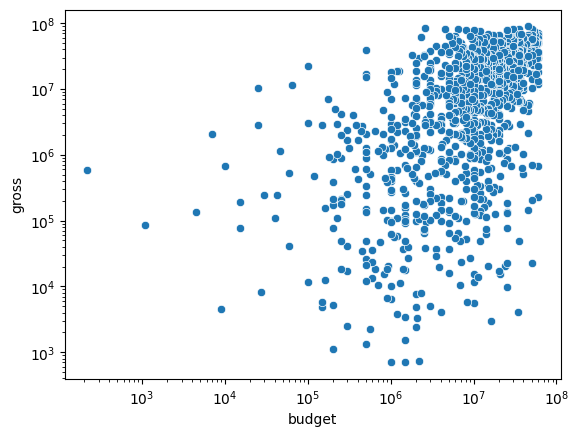

There is a strong correlation between budget and gross of 0.48 with a p-value of 0.00


In [53]:
sns.scatterplot(x=full_df.budget, y=full_df.gross)
# use log scale for better visualization
plt.xscale('log')
plt.yscale('log')
plt.show()
# statistical test for correlation between budget and gross

corrtest = pearsonr(full_df.budget, full_df.gross)
print(f"There is a strong correlation between budget and gross of {corrtest[0]:.2f} with a p-value of {corrtest[1]:.2f}")

We can therefore infer from the data that the gross revenue is an incomplete measure of success because it depends a lot of the budget. Big budget movies will create more engagement (as we see with the high correlation with users critics, votes, and reviews) and more sales. However, it does not mean that the movie is good or appreciated by the audience.

Let's see if we can find a financial metric that is less predictable. We will compute the gross margin of the movie and see if it is more correlated with the rating.

$$\text{Gross Margin} = \frac{\text{Gross} - \text{Budget}}{\text{Gross}}$$

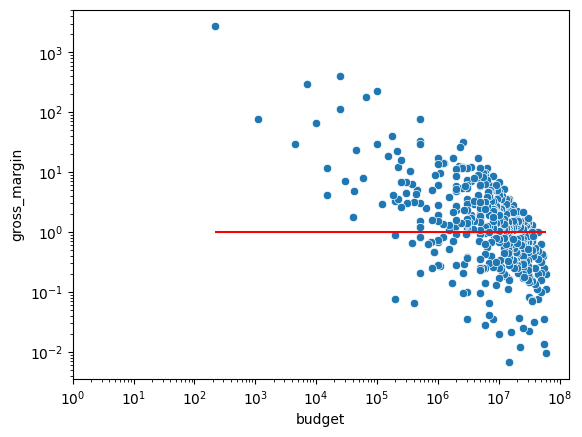

The correlation is not significant at a 5% confidence level with a p-value of 0.06


In [54]:
full_df["gross_margin"] = (full_df.gross - full_df.budget) / full_df.budget

sns.scatterplot(x=full_df.budget, y=full_df.gross_margin)
plt.xscale('log')
plt.yscale('log')
plt.hlines(1, full_df.budget.min(), full_df.budget.max(), colors='red')
plt.show()

corrtest = pearsonr(full_df.budget, full_df.gross_margin)
print(f"The correlation is not significant at a 5% confidence level with a p-value of {corrtest[1]:.2f}")

if "gross_margin" not in success_info:
    success_info = success_info + ["gross_margin"]
    full_df = full_df[general_info + personal_info + success_info]



In [55]:
corrtest = pearsonr(full_df.gross_margin, full_df.imdb_score)
print(f"However, the correlation between gross margin and imdb score is not significant (pvalue of {corrtest[1]:.2f}).")

However, the correlation between gross margin and imdb score is not significant (pvalue of 0.20).


The question is now whether we should focus on the IMDB rating or the gross margin as a director. In the end, we want to make sure that our movie is viable which will point us towards the gross margin. If the movie is not appreciated by the audience, it won't generate the expected revenue and will be reflected in the gross margin. Now why don't we see that correlation? A possible explanation is that the [IMDB rating are skewed towards the high ratings](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/) and thus quite poorly differentiate the movies. We can check these allegations by plotting the distribution of the ratings.

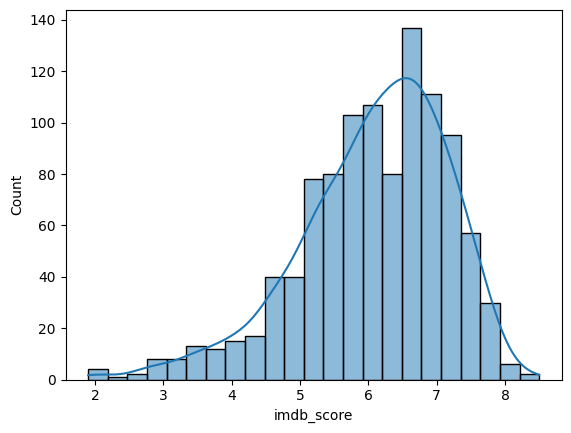

In [56]:
sns.histplot(full_df.imdb_score, kde=True)
plt.show()

c:\Users\User\Desktop\hackathon\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


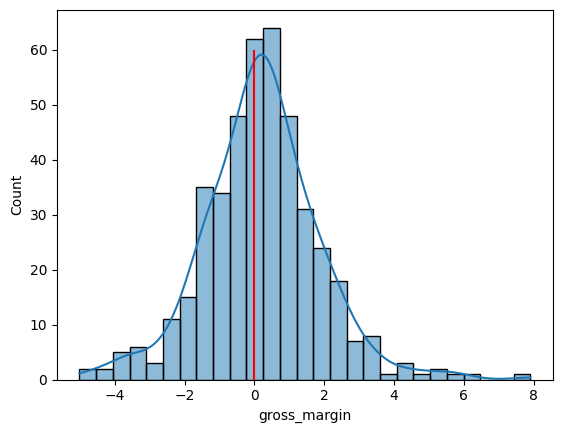

In [57]:
sns.histplot(np.log(full_df.gross_margin), kde=True)
plt.vlines(0, 0, 60, colors='red')
plt.show()

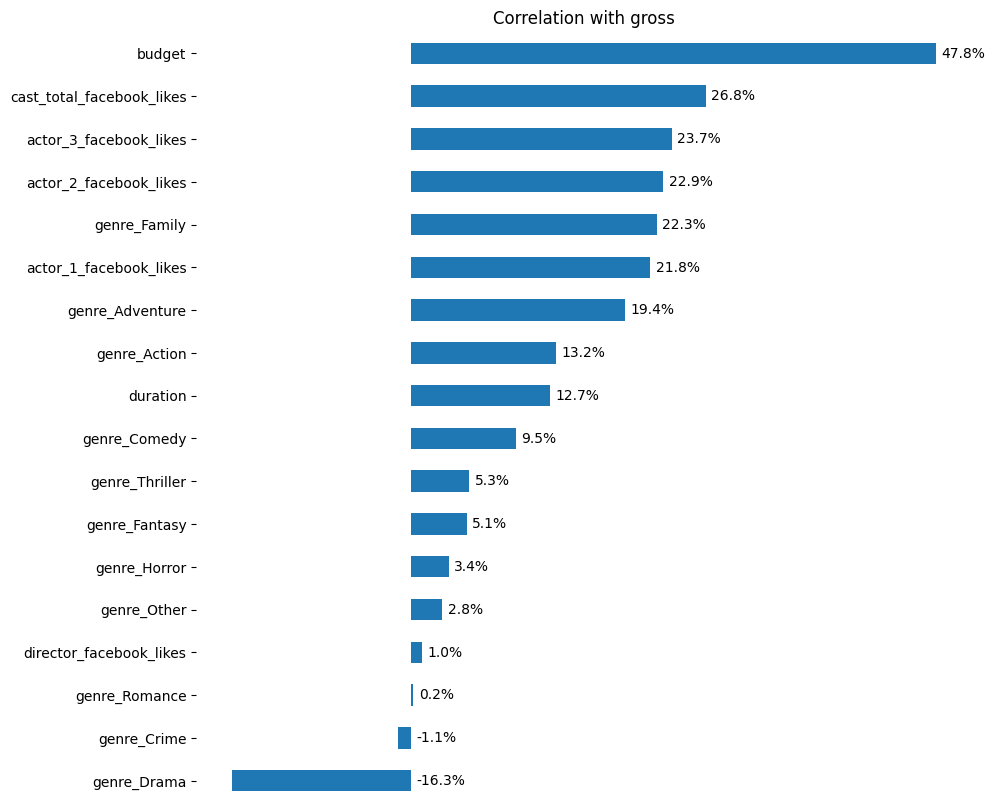

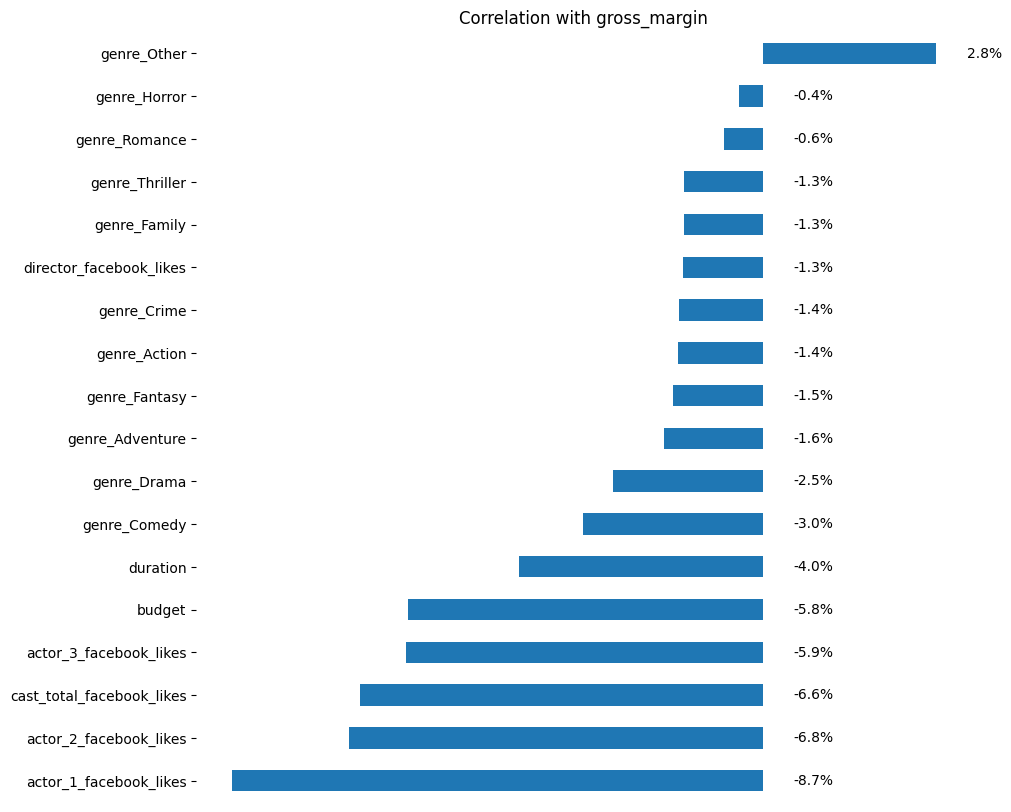

In [67]:
target_var = "gross"

def show_corr(target_var):
    cond_prev = ~full_df.columns.isin(success_info)
    cond_num = full_df.dtypes != "object"
    cond = cond_prev & cond_num
    corr = pd.concat([full_df.loc[:, cond], full_df.loc[:,target_var]], axis=1).corr()[target_var].sort_values(ascending=True).drop(
        target_var)

    plot = corr.plot(kind='barh', figsize=(10, 10), title=f"Correlation with {target_var}")
    for i, v in enumerate(corr):
        plt.text(max(v,0)+0.005, i, f"{v:.1%}", color='black', va='center')
    plt.box(False)
    plt.xticks([])
    return plot

show_corr(target_var)
plt.show()
show_corr("gross_margin")
plt.show()


In [63]:
full_df.to_csv('../data/full_dataset.csv', index=False)

The genres should be better formatted to enable analysis. The genres are currently in a string format, and we need to convert them into a list of genres and then binarize them into various columns.

In [59]:
full_df["genres_list"] = full_df["genres"].apply(lambda x: x.split("|"))
genre_counts = full_df["genres_list"].explode().value_counts()/full_df.shape[0]
# Create new columns with the top 10 genres
if not full_df.columns.str.contains("genre_").any():
    for genre in genre_counts.index[:10]:
        full_df["genre_"+genre] = full_df["genres_list"].apply(lambda x: genre in x)
    full_df["genre_Other"] = full_df["genres_list"].apply(lambda x: set(x).intersection(set(genre_counts.index[10:])) != set())

    # Let's update the general_info list
    general_info = general_info + [col for col in full_df.columns if "genre_" in col]
    full_df = full_df[general_info + personal_info + success_info]

full_df.head()

,movie_title,duration,genres,language,country,content_rating,budget,genre_Drama,genre_Comedy,genre_Romance,genre_Thriller,genre_Crime,genre_Action,genre_Adventure,genre_Horror,genre_Family,genre_Fantasy,genre_Other,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,gross_margin
0,The Spanish Prisoner,110.0,Drama|Mystery|Thriller,English,USA,PG,10000000.0,True,False,False,True,False,False,False,False,False,False,True,David Mamet,Ben Gazzara,Felicity Huffman,Campbell Scott,342.0,623.0,508.0,393.0,1722,10200000.0,7.3,578,97.0,18697,263.0,0.020000
1,Oceans,104.0,Documentary|Drama,French,France,G,40000000.0,True,False,False,False,False,False,False,False,False,False,True,Jacques Perrin,Pedro Armendáriz Jr.,Jacques Perrin,Rie Miyazawa,63.0,67.0,63.0,7.0,152,19406406.0,7.8,0,113.0,7630,42.0,-0.514840
2,Exorcist: The Beginning,125.0,Horror|Mystery|Thriller,English,USA,R,50000000.0,False,False,False,True,False,False,False,True,False,False,True,Renny Harlin,James D'Arcy,Alan Ford,Izabella Scorupco,212.0,613.0,422.0,394.0,1970,41814863.0,5.1,893,167.0,28635,308.0,-0.163703
3,First Knight,134.0,Action|Adventure|Romance|Thriller,English,USA,PG-13,55000000.0,False,False,True,True,False,True,True,False,False,False,False,Jerry Zucker,Julia Ormond,Ben Cross,John Gielgud,109.0,919.0,303.0,249.0,1695,37600435.0,5.9,0,53.0,55350,180.0,-0.316356
4,This Is It,111.0,Documentary|Music,English,USA,PG,60000000.0,False,False,False,False,False,False,False,False,False,False,True,Kenny Ortega,Misha Gabriel Hamilton,Mekia Cox,Judith Hill,197.0,433.0,208.0,6.0,679,71844424.0,7.3,0,136.0,33158,223.0,0.197407


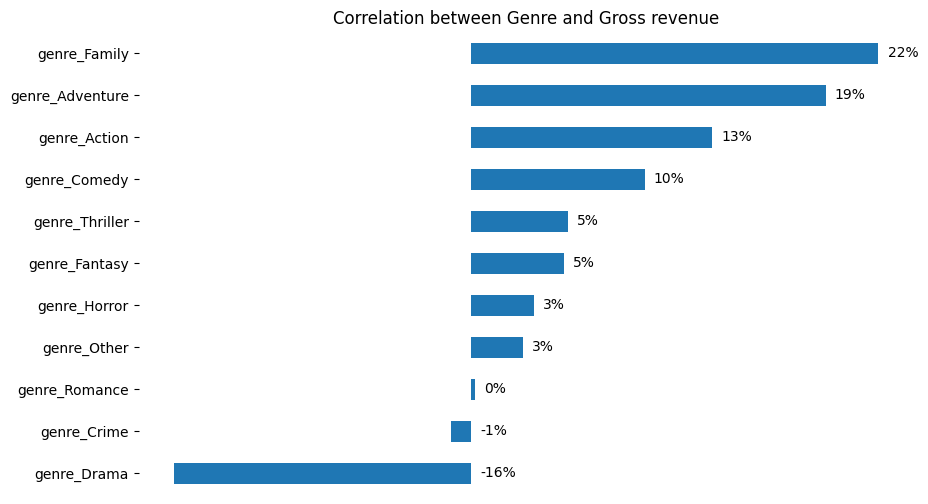

In [60]:
import seaborn as sns

# Plot horizontal bar chart

genre_corr = full_df[list(full_df.columns[full_df.columns.str.contains("genre_")])+["gross"]].corr()["gross"].sort_values().drop("gross")
genre_corr.plot(kind="barh", figsize=(10,6), title="Correlation between Genre and Gross revenue")
for i in range(len(genre_corr)):
    plt.text(max(genre_corr.values[i],0)+0.005, i, f"{genre_corr.values[i]:.0%}", va="center")
plt.box(False)
plt.xticks([])
plt.show()

In [61]:
import seaborn as sns

full_df.describe() # No missing values in the numerical values
full_df.isna().sum() # There are missing values in the categorical values

movie_title                   0
duration                      0
genres                        0
language                      3
country                       0
content_rating               36
budget                        0
genre_Drama                   0
genre_Comedy                  0
genre_Romance                 0
genre_Thriller                0
genre_Crime                   0
genre_Action                  0
genre_Adventure               0
genre_Horror                  0
genre_Family                  0
genre_Fantasy                 0
genre_Other                   0
director_name                 0
actor_1_name                  2
actor_2_name                  3
actor_3_name                  5
director_facebook_likes       0
actor_1_facebook_likes        2
actor_2_facebook_likes        3
actor_3_facebook_likes        5
cast_total_facebook_likes     0
gross                         0
imdb_score                    0
movie_facebook_likes          0
num_critic_for_reviews        1
num_vote